# > Búsqueda en abanico

In [1]:
import numpy as np
import matplotlib.pyplot as plt

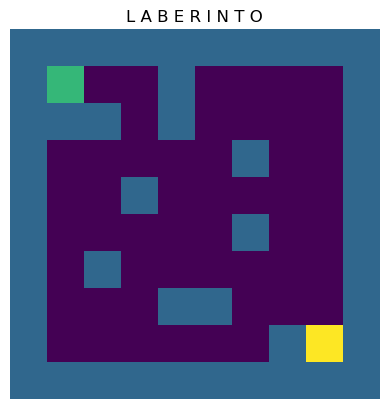

In [2]:
# CREACIÓN DEL LABERINTO
n = 10
def crear_lab():
    lab = np.zeros((n,n),dtype=int) 

    # Bordes
    for t in range(n):
        lab[0,t] = 1
        lab[n-1,t] = 1
        lab[t,0] = 1
        lab[t,n-1] = 1
        

    lab[1,1] = 2 # INICIO
    lab[n-2,n-2] = 3 # SOLUCIÓN
    
    return lab

# CREACIÓN DEL LABERINTO CON PAREDES ALEATORIAS
def aleatorio_lab():
    lab = crear_lab()
    
    t = 0
    porcentaje = 20
    while t < (porcentaje / 100) * n * n:
        i = np.random.randint(n)
        j = np.random.randint(n)
        lab[i,j] = 1
        t = t + 1

    lab[1,1] = 2 # INICIO
    lab[n-2,n-2] = 3 # SOLUCIÓN
    
    return lab

def mostrar_lab(arr, titulo):
    plt.axis('off')
    plt.title(titulo)
    plt.imshow(arr)

#laberinto = crear_lab()
laberinto = aleatorio_lab()
mostrar_lab(laberinto, 'L A B E R I N T O')

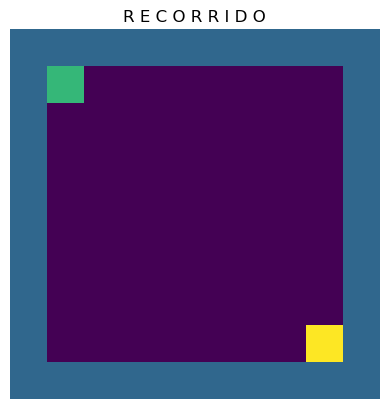

In [3]:
# CREACIÓN DE LA MATRIZ DE MARCADO O MARK
mark = crear_lab()
mostrar_lab(mark, 'R E C O R R I D O')

ENCONTRADO
[[1, 1], [1, 2], [1, 3], [2, 3], [3, 3], [3, 4], [3, 2], [3, 5], [4, 4], [4, 2], [3, 1], [4, 5], [5, 4], [5, 2], [4, 1], [4, 6], [5, 5], [6, 4], [5, 3], [5, 1], [4, 7], [6, 5], [6, 3], [6, 1], [4, 8], [5, 7], [6, 6], [7, 3], [7, 1], [5, 8], [6, 7], [7, 6], [8, 3], [7, 2], [8, 1], [6, 8], [7, 7], [8, 6], [8, 4], [8, 2], [7, 8]]


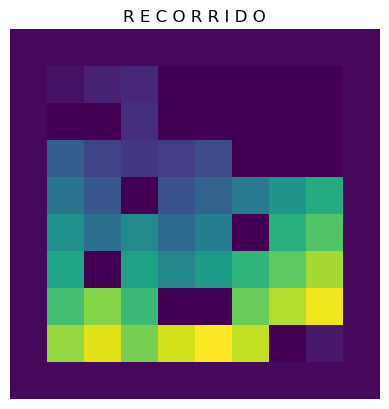

In [4]:
# MATRIZ DE MOVIMIENTO
def matriz_mov():
    move = np.zeros((4,2),dtype=int) 
    move[0,0] = 0
    move[0,1] = 1
    move[1,0] = 1
    move[1,1] = 0
    move[2,0] = 0
    move[2,1] = -1
    move[3,0] = -1
    move[3,1] = 0
    return move

# RECORRIDO EN ABANICO RECURSIVO
color = 4
def abanico_r(i, j, cola = [] ,recorrido = []):
    """ 
    Método que recorre la matriz laberinto a través de un recorrido en abanico recursivo
    Parametros:
        i (int): posición en x o en fila
        j (int): posición en y o en columna
    Muestra:
        una string: 'ENCONTRADO' O NO 'ENCOTRADO'
        recorrido (matriz): las posiciones por las que ha ido pasando
    """
    global color
    try:
        recorrido.append([i,j])
        if cola: cola.pop(0) # Si la cola no está vacía elimina el primer elemento
        for mov in range(0,3):
            g = i + m_mov[mov,0]
            h = j + m_mov[mov,1]
            if ((g == n-2) and (h == n-2)): # FINAL o SOLUCIÓN
                print("ENCONTRADO")
                print(recorrido)
                return
            if (g >= 0 and g <= n and h >= 0 and h <= n):
                if ((laberinto[g,h] == 0) and (mark[g,h] == 0)):
                    mark[g,h] = color # Marca el recorrido
                    color = color + 1
                    cola.append([g,h])
        abanico_r(cola[0][0], cola[0][1])
    except:
        print("NO ENCONTRADO")
        print(recorrido)

m_mov = matriz_mov()
abanico_r(1, 1)
mostrar_lab(mark, 'R E C O R R I D O')

In [5]:
print(abanico_r.__doc__)

 
    Método que recorre la matriz laberinto a través de un recorrido en abanico recursivo
    Parametros:
        i (int): posición en x o en fila
        j (int): posición en y o en columna
    Muestra:
        una string: 'ENCONTRADO' O NO 'ENCOTRADO'
        recorrido (matriz): las posiciones por las que ha ido pasando
    
